In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from sklearn.impute import KNNImputer
import category_encoders as ce
from sklearn.model_selection import cross_val_score,cross_validate
from imblearn.over_sampling import SMOTE
import catboost
import lightgbm
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [4]:
#loading dataset
data=pd.read_csv("C:/Users/sande/OneDrive/Desktop/project_data.csv")

In [5]:
data.head()

,assembly_no,year,candidate,gender,age,seat_category,caste,party,total_electors,result,contested,mus_pop
0,1,2015,Dhirendra Pratap Singh alias Rinku singh,MALE,40.0,GEN,gen,JD(U),331874,1,0,21.98
1,1,2015,Rajesh Singh,MALE,42.0,GEN,gen,INC,331874,0,1,21.98
2,1,2015,Sumant Kumar,MALE,26.0,ST,st,JAPL,331874,0,1,21.98
3,1,2015,Baidyanath Prasad,MALE,61.0,ST,st,BSP,331874,0,1,21.98
4,1,2015,Mahendra Kumar Bharti,MALE,64.0,GEN,obc,LJP,331874,0,0,21.98


In [6]:
data=data.sample(frac=1,random_state=10)

In [7]:
data

,assembly_no,year,candidate,gender,age,seat_category,caste,party,total_electors,result,contested,mus_pop
4160,141,2015,BANWARI PASWAN,MALE,51.0,SC,sc,BMUP,249251,0,0,13.71
4839,165,2010,Uchit Kumar,MALE,37.3,GEN,obc,IND,268850,0,0,8.07
1875,68,2015,Bibhash Chandra Choudhary,MALE,31.0,GEN,obc,LJP,271982,0,0,44.47
4006,135,2015,AMAR KUMAR JHA,MALE,43.8,GEN,obc,JP,270457,0,0,10.62
4456,152,2010,Renu Choudhary,MALE,42.6,GEN,obc,CPI,208378,0,0,17.68
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,42,2010,Rajendera Nirala,MALE,49.0,GEN,obc,RJP,211456,0,0,18.36
3441,117,2010,Khurshid Alam,MALE,59.0,GEN,obc,JP(S),187178,0,0,10.28
1344,48,2010,Pradeep Yadav,MALE,39.0,GEN,obc,SP,241677,0,1,42.95
4623,158,2015,BRAHAMDEV PASWAN,MALE,38.2,SC,sc,IND,326124,0,0,17.68


In [8]:
data.shape

(7256, 12)

# EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7256 entries, 4160 to 1289
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   assembly_no      7256 non-null   int64  
 1   year             7256 non-null   int64  
 2   candidate        7256 non-null   object 
 3   gender           7256 non-null   object 
 4   age              7256 non-null   float64
 5   seat_category    7256 non-null   object 
 6   caste            7256 non-null   object 
 7   party            7256 non-null   object 
 8    total_electors  7256 non-null   int64  
 9   result           7256 non-null   int64  
 10  contested        7256 non-null   int64  
 11  mus_pop          7256 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 736.9+ KB


In [46]:
data['gender'].value_counts()
male_candidate=6701
female_candidate=554

In [14]:
#percentage of female candidate contests election
data['gender'].value_counts()
print('percentage of female candidate:',round((554/6701)*100,2),'%')

percentage of female candidate: 8.27 %


In [113]:
data['seat_category'].value_counts()

GEN    6023
SC     1166
ST       67
Name: seat_category, dtype: int64

In [114]:
#total number of candidate caste wise
data['caste'].value_counts()

obc    4596
gen    1312
sc     1286
st       62
Name: caste, dtype: int64

In [20]:
# name of all party who participated in election
data['party'].unique()

array(['BMUP', 'IND', 'LJP', 'JP', 'CPI', 'CPI(ML)(L)', 'SP', 'TPLRSP',
       'INC', 'SHS', 'RTJHPR', 'RJD', 'CPM', 'BJP', 'BED', 'BSP', 'PPID',
       'RLSP', 'RJnJnP', 'NCP', 'BJJD', 'JKiP', 'SBSP', 'SaBP', 'RSWD',
       'JD(U)', 'RPPRINAT', 'JD(S)', 'ANC', 'SPL', 'PBLBRP', 'HNDUAWMMNC',
       'RSTSWNTP', 'RSTSAHP', 'AngSP', 'BAHUMP', 'VCSMP', 'BPL', 'LSSP',
       'BMF', 'RJBP', 'SJPR', 'SUCI', 'RSMD', 'AIMF', 'NJANP', 'VBA',
       'BJKD(D)', 'JAPL', 'JP(S)', 'AAAAP', 'APKSP', 'RJPty', 'BVM',
       'VSIP', 'WAP', 'AMiP', 'IJP', 'SSD', 'KSLJNP', 'VIP', 'BHRTSBLP',
       'APoI', 'RTPP', 'JPS', 'BDlP', 'SAP', 'BRRTD', 'JANADIP', 'JMM',
       'RSTJLKPS', 'RSSCMJP', 'BHAIP', 'KSP', 'CPIM', 'SANVP', 'RJCHD',
       'RSD', 'AIMIM', 'BYPP', 'SDPI', 'AIFB', 'LPSP', 'ASP', 'JNSNGHDL',
       'BNDl', 'RPP', 'SJDD', 'SBP', 'BJKD', 'PSS', 'BJNJGD', 'SPAKP',
       'LGJNPSCL', 'RSTJNVKSP', 'BHULKD', 'SJP', 'RKJP', 'MKDVP',
       'RTMNSWP', 'LJVM', 'RTJPS', 'GVP', 'SatBP', 'Ã¯Â»Â¿AIFB', 'H

In [21]:
# total number of unique party who contests election
len(data['party'].unique())

269

In [116]:
#number of seats on which party contest election 
data['party'].value_counts()

IND       2641
BSP        317
INC        313
RJD        312
JD(U)      256
          ... 
RWJS         1
SBSPSP       1
RaJPa        1
JDP          1
mimm         1
Name: party, Length: 269, dtype: int64

In [34]:
#average age of candidate
print('average age of candidate:',data['age'].mean())

#average age of candidate who won the election
print('average age winning candidate:',data[data['result']==1]['age'].mean())

average age of candidate: 44.428514332965825
average age winning candidate: 44.77227926078029


In [36]:
data

,assembly_no,year,candidate,gender,age,seat_category,caste,party,total_electors,result,contested,mus_pop
4160,141,2015,BANWARI PASWAN,MALE,51.0,SC,sc,BMUP,249251,0,0,13.71
4839,165,2010,Uchit Kumar,MALE,37.3,GEN,obc,IND,268850,0,0,8.07
1875,68,2015,Bibhash Chandra Choudhary,MALE,31.0,GEN,obc,LJP,271982,0,0,44.47
4006,135,2015,AMAR KUMAR JHA,MALE,43.8,GEN,obc,JP,270457,0,0,10.62
4456,152,2010,Renu Choudhary,MALE,42.6,GEN,obc,CPI,208378,0,0,17.68
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,42,2010,Rajendera Nirala,MALE,49.0,GEN,obc,RJP,211456,0,0,18.36
3441,117,2010,Khurshid Alam,MALE,59.0,GEN,obc,JP(S),187178,0,0,10.28
1344,48,2010,Pradeep Yadav,MALE,39.0,GEN,obc,SP,241677,0,1,42.95
4623,158,2015,BRAHAMDEV PASWAN,MALE,38.2,SC,sc,IND,326124,0,0,17.68


In [55]:
#number of male winning candidate 
male_winner=(data[data['gender']=='MALE']['result'].sum())
print(male_winner)

#number of female winning candidate
female_winner=(data[data['gender']=='FEMALE']['result'].sum())
print(female_winner)

442
45


In [59]:
#strike rate gender wise
male_str_rate=(male_winner/male_candidate)*100
print('male strike rate:',male_str_rate)

female_str_rate=(female_winner/female_candidate)*100
print('female strike rate:',female_str_rate)

male strike rate: 6.596030443217431
female strike rate: 8.12274368231047


# Graphical Analysis

C:\Users\sande\AppData\Local\Temp\ipykernel_16372\2425453862.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

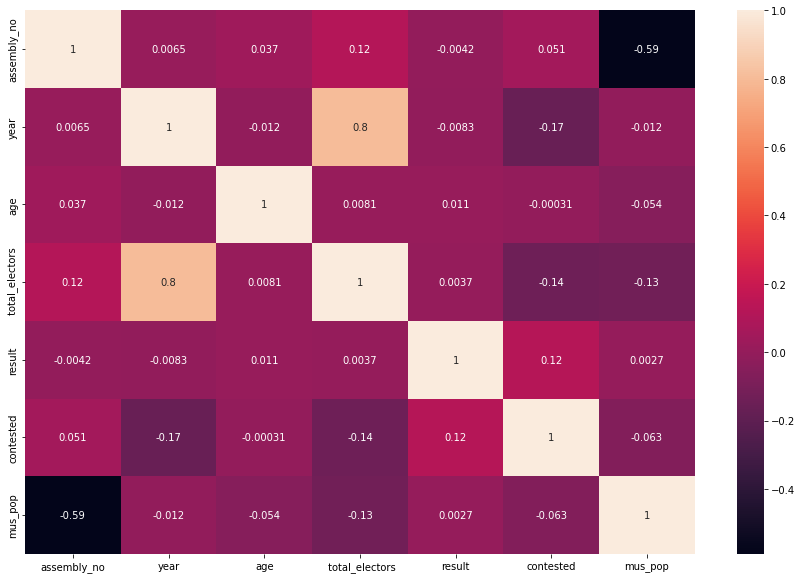

In [117]:
#correlation matrix 
plt.figure(figsize=[15,10])
sns.heatmap(data.corr(),annot=True)

average age of candidate: 44


<Axes: xlabel='age', ylabel='Count'>

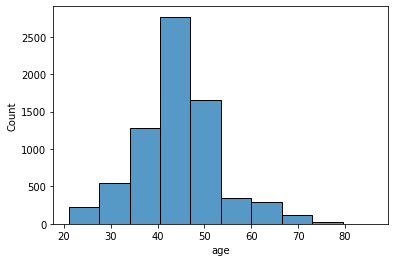

In [35]:
#Histogram for age column
print('average age of candidate:',round(data['age'].mean()))
sns.histplot(data['age'],bins=10)

In [31]:
#average age of candidate who won the election
data[data['result']==1]['age'].mean()

44.77227926078029

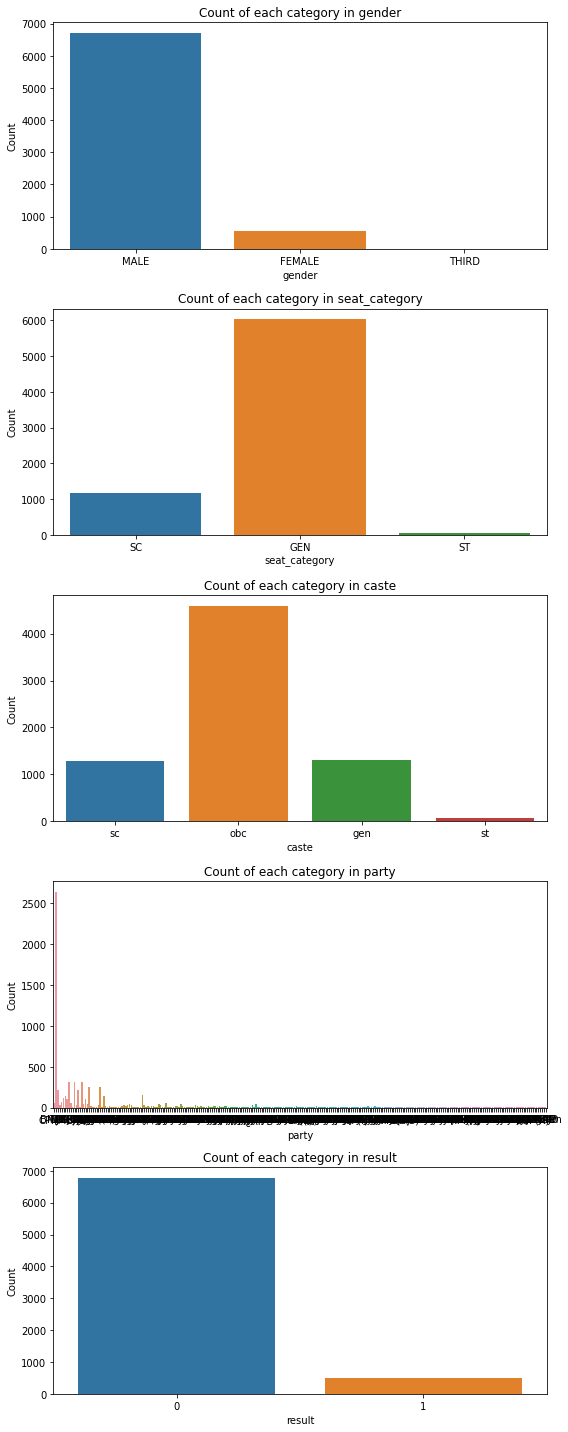

In [119]:
# Check basic statistics for categorical columns

categorical_columns = ['gender', 'seat_category', 'caste', 'party','result']

# Create subplots for count plots
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(8, 20))

# Plot the count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Count of each category in {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

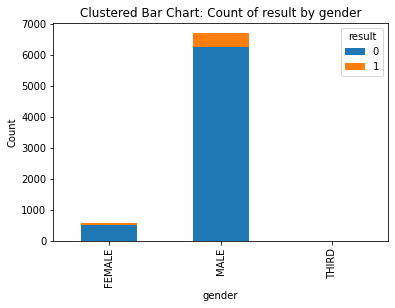

In [120]:
#Clustered Bar Chart:
data.groupby(['gender', 'result']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Clustered Bar Chart: Count of result by gender')
plt.show()

# DATA PROCESSING

In [121]:
#droping year and candidate
data=data.drop(columns=['year','candidate'],axis=1)

In [122]:
#mapping gender column
data['gender']=data['gender'].map({'MALE':1,'FEMALE':0,'THIRD':0})

In [123]:
#creating dummies variable for seat_category
data=pd.get_dummies(data,columns=['seat_category'])
data=data.drop(['seat_category_ST'],axis=1)

In [124]:
#filling missing value with obc
#data['caste']=data['caste'].fillna('obc')

#creating dummies variable for caste
data=pd.get_dummies(data,columns=['caste'])
data=data.drop(['caste_st'],axis=1)

In [125]:
#target encoding

#encoder=ce.TargetEncoder(cols=['party'])
#encoder_party=encoder.fit_transform(data['party'],data['result'])
#data['encoder_party']=encoder_party

data["party_encoded"] = data.groupby("party")["result"].transform("mean")+0.0001
data=data.drop(['party'],axis=1)

In [126]:
data.duplicated().value_counts()

False    5952
True     1304
dtype: int64

In [127]:
data.drop_duplicates(inplace=True)

<Figure size 1080x720 with 0 Axes>

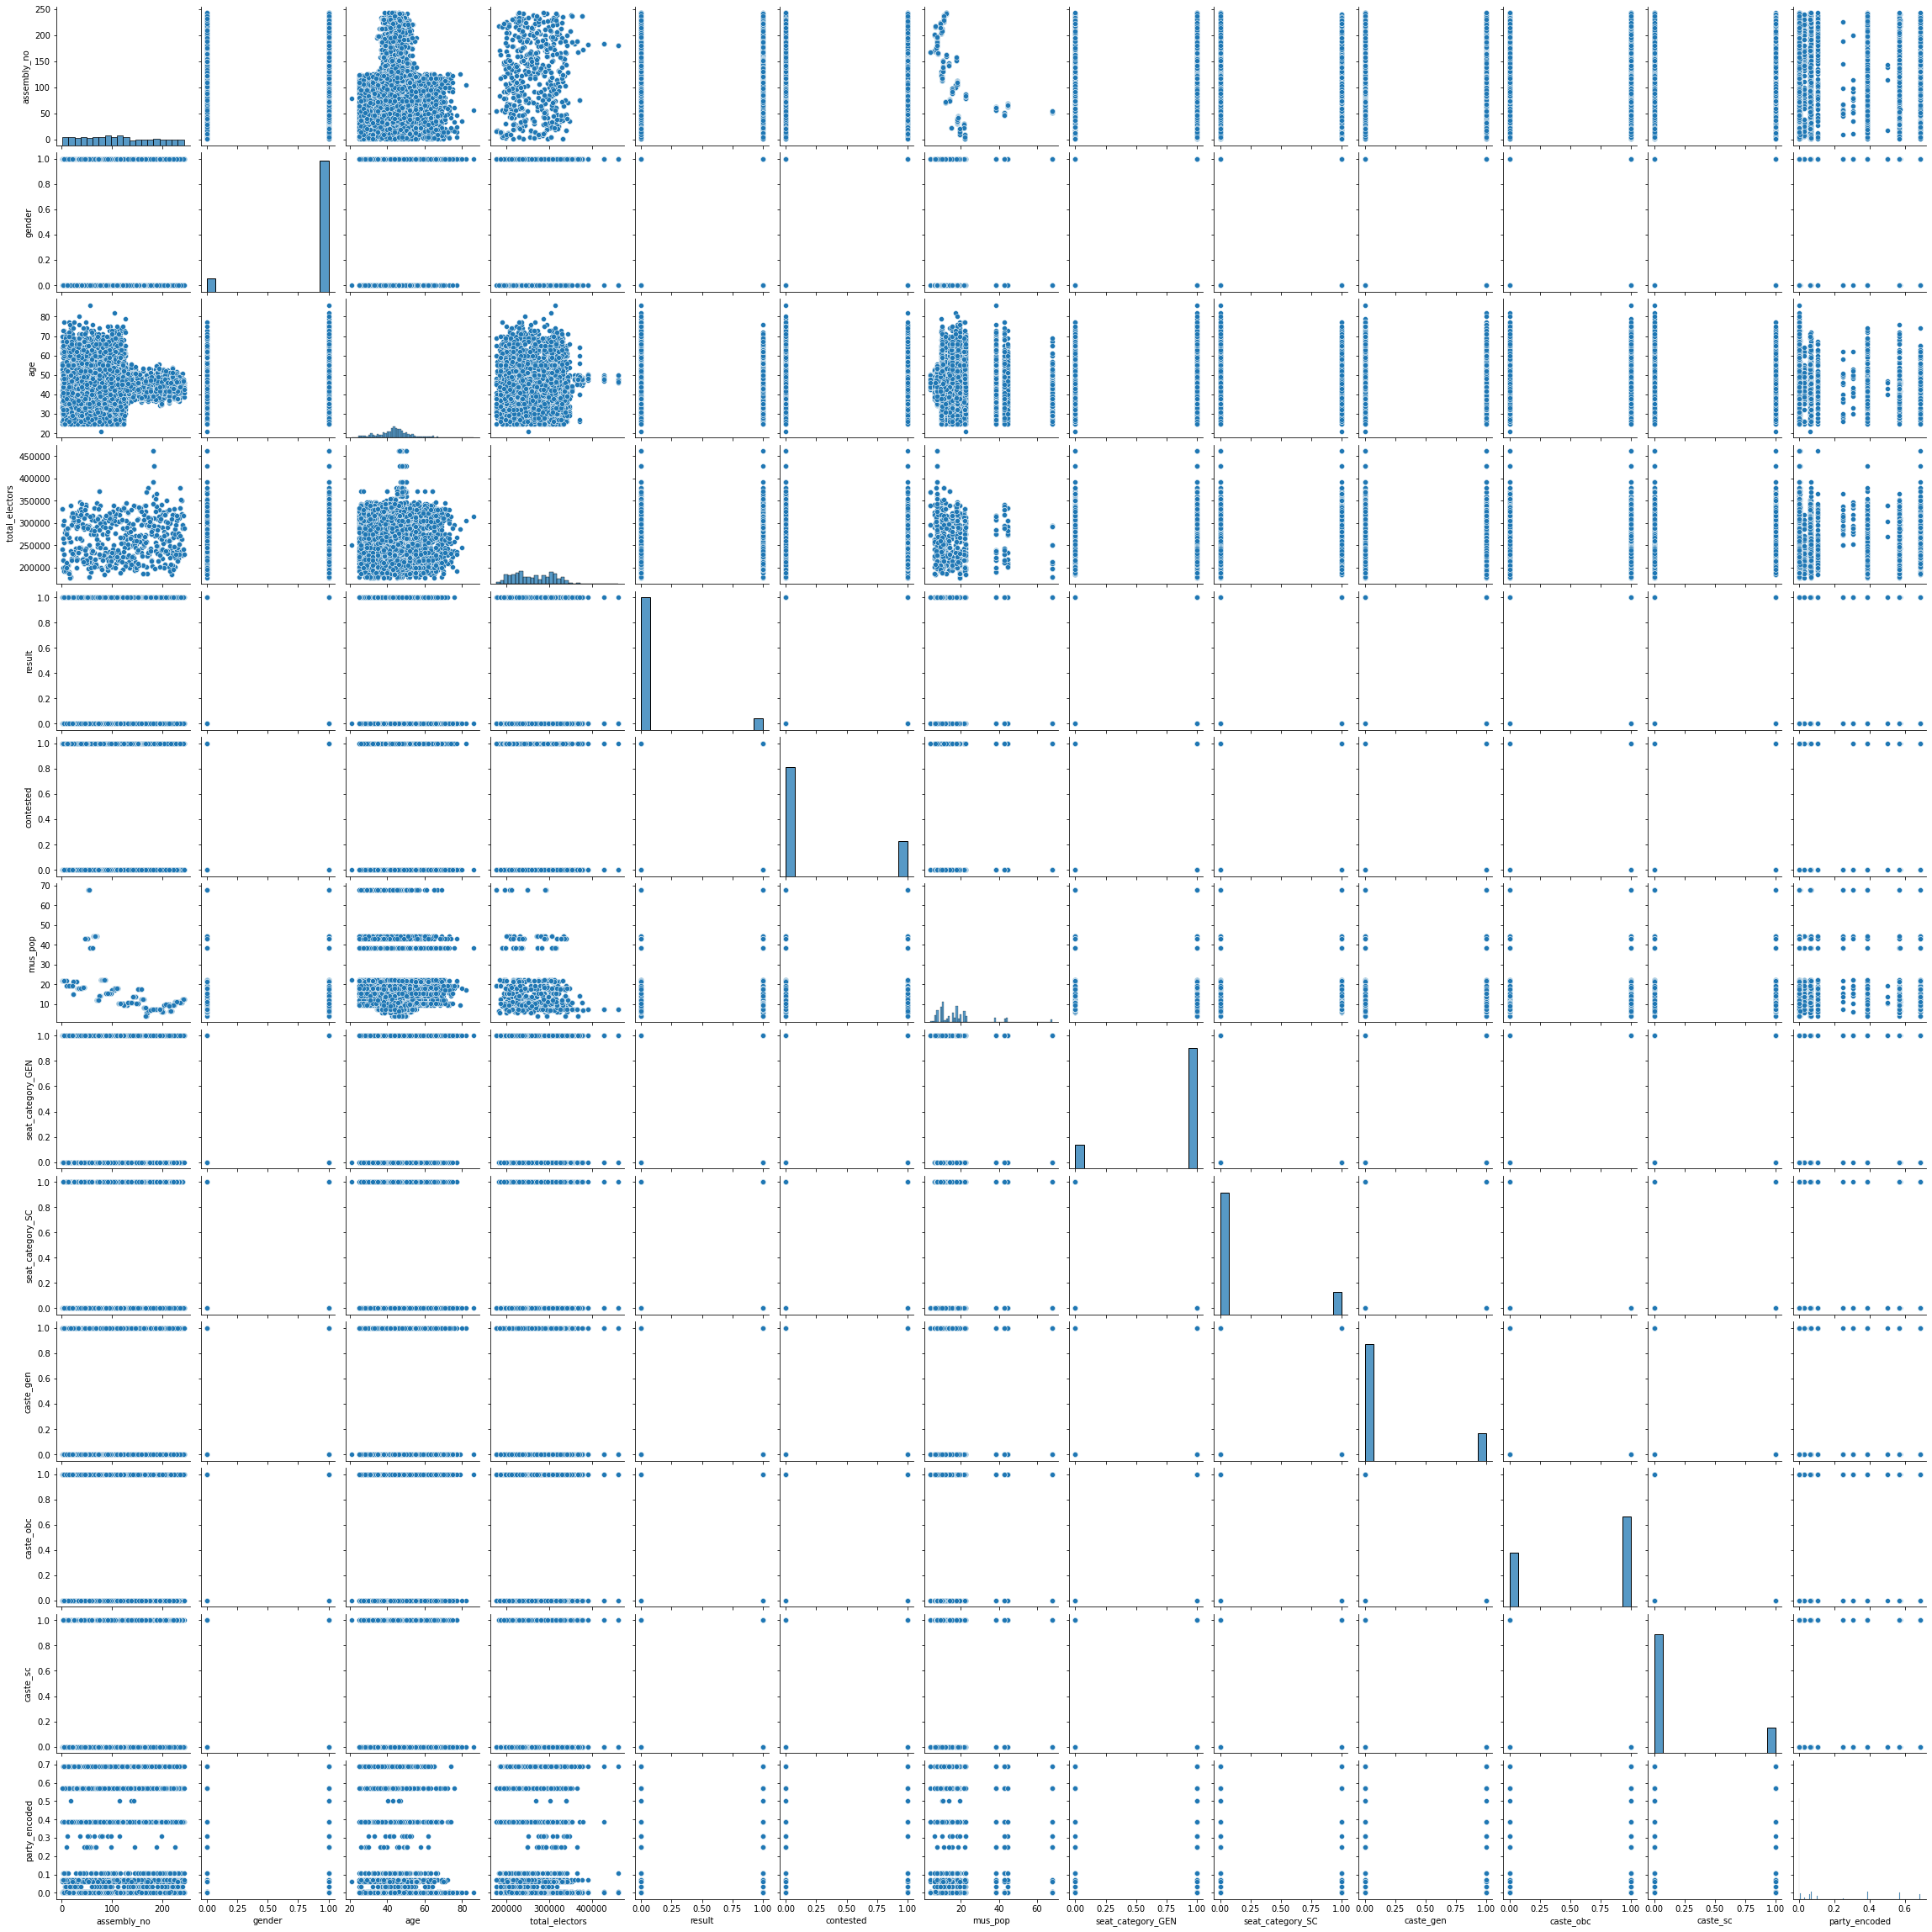

In [181]:
#pairplot
plt.figure(figsize=[15,10])
sns.pairplot(data)

In [183]:
data

,assembly_no,gender,age,total_electors,result,contested,mus_pop,seat_category_GEN,seat_category_SC,caste_gen,caste_obc,caste_sc,party_encoded
4160,141,1,51.0,249251,0,0,13.71,0,1,0,0,1,0.000100
4839,165,1,37.3,268850,0,0,8.07,1,0,0,1,0,0.002372
1875,68,1,31.0,271982,0,0,44.47,1,0,0,1,0,0.062005
4006,135,1,43.8,270457,0,0,10.62,1,0,0,1,0,0.000100
4456,152,1,42.6,208378,0,0,17.68,1,0,0,1,0,0.032358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,42,1,49.0,211456,0,0,18.36,1,0,0,1,0,0.000100
3441,117,1,59.0,187178,0,0,10.28,1,0,0,1,0,0.000100
1344,48,1,39.0,241677,0,1,42.95,1,0,0,1,0,0.000100
4623,158,1,38.2,326124,0,0,17.68,0,1,0,0,1,0.002372


C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

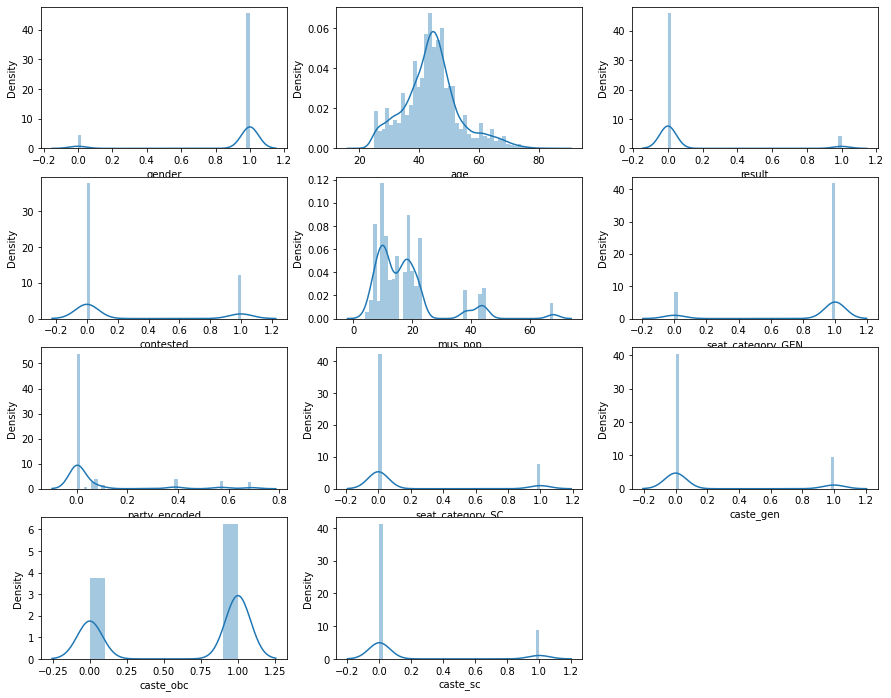

In [194]:
#distribution plot
plt.figure(figsize=(15,12))

plt_cols = ['gender','age','result','contested','mus_pop','seat_category_GEN','party_encoded','seat_category_SC','caste_gen','caste_obc','caste_sc']

# I didnt plot the star_f columns because they are highly correlated to norating1 and noreviews1 
# columns & have similar distributions to them

k=1
for i in plt_cols:
    plt.subplot(4,3,k)
    sns.distplot(data[i])
    k=k+1

In [154]:
#dividing input and output
x=data.drop(['result'],axis=1)
y=data['result']

# Model Building

In [155]:
#Here im using imblearn pipeline insted of pipeline because it handle sampling properly
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [156]:
std=StandardScaler()
x_train_std=std.fit_transform(x)

In [157]:
#lOGISTIC REGESSION
lr=LogisticRegression()
resampling=SMOTE()
pipeline=Pipeline([('SMOTE',resampling),('LOGISTIC' ,lr)])
scores=cross_val_score(pipeline,x_train_std,y,scoring='f1',cv=5)
scores

array([0.66923077, 0.60606061, 0.67680608, 0.66393443, 0.6405694 ])

In [158]:
print('Average Score is:',scores.mean())
print('Standard Deviation of score:',np.std(scores))

Average Score is: 0.6513202560377735
Standard Deviation of score: 0.02566494928995177


In [159]:
#LightGBM
lgb=LGBMClassifier()
resampling=SMOTE()
pipeline=Pipeline([('SMOTE',resampling),('LightGBM' ,lgb)])
scores=cross_val_score(pipeline,x_train_std,y,scoring='f1',cv=5)
scores

array([0.61320755, 0.61403509, 0.67782427, 0.68269231, 0.63865546])

In [160]:
print('Average Score is:',scores.mean())
print('Standard Deviation of score:',np.std(scores))

Average Score is: 0.6452829345097435
Standard Deviation of score: 0.030025260580181276


In [161]:
#XGBOOST CLASSIFIER
xgb=XGBClassifier()
resampling=SMOTE()
pipeline=Pipeline([('SMOTE',resampling),('logistic regression' ,xgb)])
scores=cross_val_score(pipeline,x_train_std,y,scoring='f1',cv=5)
scores

array([0.56122449, 0.55454545, 0.69298246, 0.65671642, 0.63348416])

In [162]:
print('Average Score is:',scores.mean())
print('Standard Deviation of score:',np.std(scores))

Average Score is: 0.6197905962576199
Standard Deviation of score: 0.05402776280437951


In [163]:
#Decision Tree
dt=DecisionTreeClassifier()
resampling=SMOTE()
pipeline=Pipeline([('SMOTE',resampling),('Decision Tree' ,dt)])
scores=cross_val_score(pipeline,x_train_std,y,scoring='f1',cv=5)
scores

array([0.51      , 0.50980392, 0.59130435, 0.63316583, 0.5470852 ])

In [164]:
print('Average Score is:',scores.mean())
print('Standard Deviation of score:',np.std(scores))

Average Score is: 0.558271860066833
Standard Deviation of score: 0.04796812840178975


In [165]:
#Random Forest
rf=RandomForestClassifier()
resampling=SMOTE()
pipeline=Pipeline([('SMOTE',resampling),('Random Forest' ,rf)])
scores=cross_val_score(pipeline,x_train_std,y,scoring='f1',cv=5)
scores

array([0.60089686, 0.59227468, 0.65254237, 0.66046512, 0.6       ])

In [166]:
print('Average Score is:',scores.mean())
print('Standard Deviation of score:',np.std(scores))

Average Score is: 0.6212358056517122
Standard Deviation of score: 0.029060003386672882


In [171]:
model=VotingClassifier(estimators=[('lr',lr),('dt',dt),('lgb',lgb),('xgb',xgb),('rf',rf)],voting='soft')
resampling=SMOTE()
pipeline=Pipeline([('SMOTE',resampling),('Random Forest' ,model)])
scores=cross_val_score(pipeline,x_train_std,y,scoring='f1',cv=5)
scores

array([0.61320755, 0.61946903, 0.70247934, 0.68571429, 0.63070539])

In [172]:
print('Average Score is:',scores.mean())
print('Standard Deviation of score:',np.std(scores))

Average Score is: 0.6503151184933232
Standard Deviation of score: 0.036571030747383174


# Model Building using train_test_split

In [173]:
#train_test_split
from sklearn.model_selection import train_test_split

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [175]:
sm = SMOTE(random_state=40)
x_res, y_res = sm.fit_resample(x_train,y_train)

In [176]:
std=StandardScaler()
x_train_std=std.fit_transform(x_res)
x_test_std=std.transform(x_test)

In [177]:
lr=LogisticRegression()
lr.fit(x_train_std,y_res)
y_pred=lr.predict(x_test_std)
f1_score(y_test,y_pred)


0.6419098143236075

In [178]:
confusion_matrix(y_test,y_pred)

array([[1530,  110],
       [  25,  121]], dtype=int64)

In [179]:
lgb=LGBMClassifier()
lgb.fit(x_train_std,y_res)
y_pred=lgb.predict(x_test_std)
f1_score(y_test,y_pred)


0.6225165562913907

In [180]:
confusion_matrix(y_test,y_pred)

array([[1578,   62],
       [  52,   94]], dtype=int64)